# Linear Regression Project 2

Ecommerce company selling clothes online via Mobile app and Website. The company is trying to decide whether to focus their efforts on their mobile app experience or their website (Spend more budget on Mobile app or Website). 

### Import Libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

## Get the Data

The file has Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

* Email: Email of the customer
* Address: Address of the customer
* Avatar: Colour of Avatar of the customer
* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 
* Yearly Amount Spent: Total amount spent by the customer in a year

In [2]:
customers = pd.read_csv("Ecommerce Customers")

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


Here we can see there is no null values in the data

## Exploratory Data Analysis

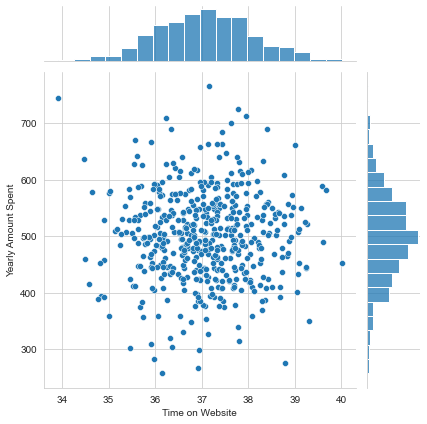

In [9]:
sns.set_style('whitegrid')
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

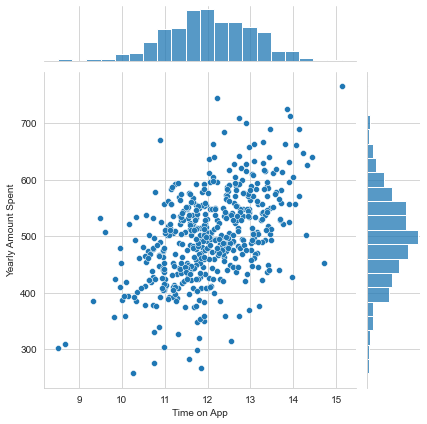

In [10]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

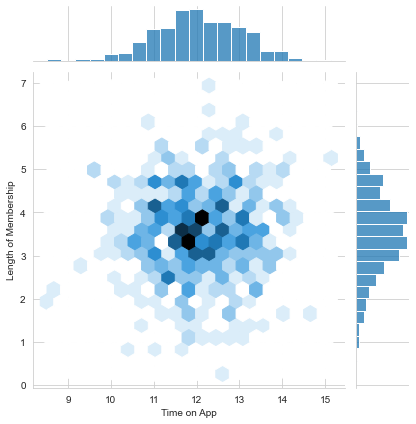

In [11]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)

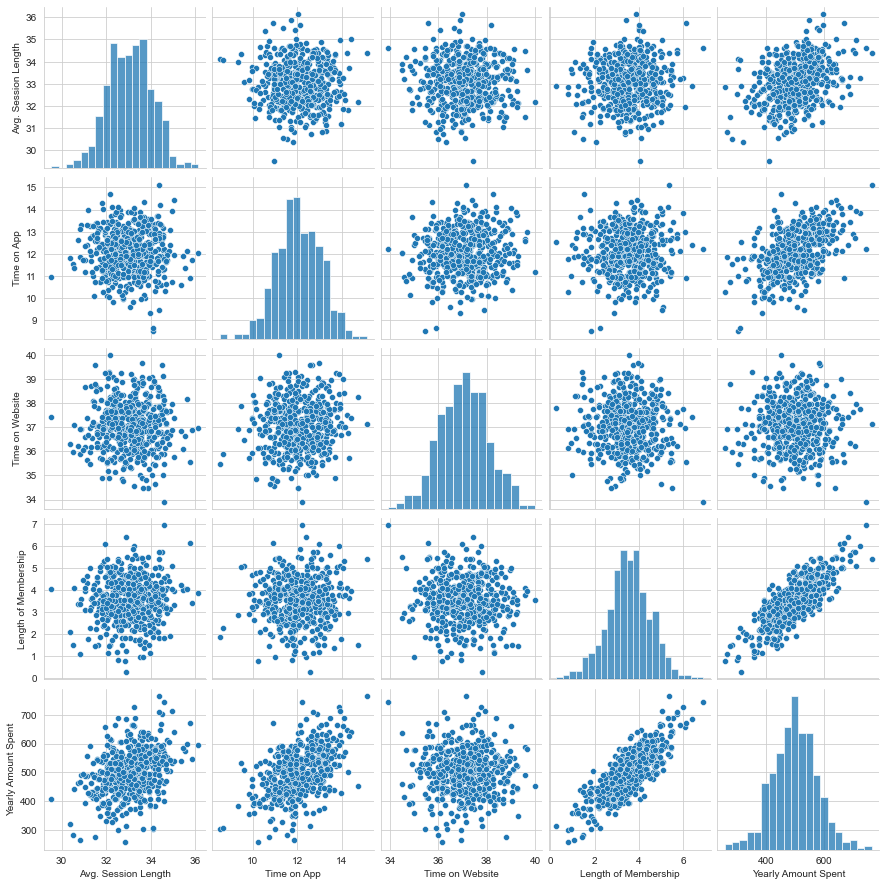

In [12]:
sns.pairplot(customers)

<Axes: >

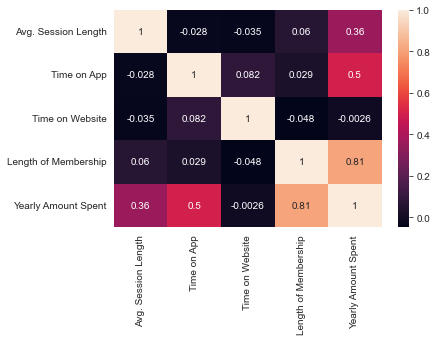

In [14]:
sns.heatmap(customers.corr(),annot=True)

* Here we can see that the length of membership is highly correlated to yearly amount spent.
* We can also see that correlation between 'Yearly Amount Spent' and ' Time on Website' is -0.026 which is least. So, we can say that the they are there is the least correaltion between the two.
* The correlation between the other two attributes which are 'Avg. Session Length' and 'Time on App' are positive with 'Yearly Amount spent

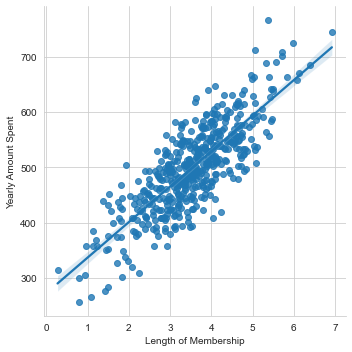

In [16]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

In the above graph, we see that there is high positive correlation between 'Yearly Amount Spent' and 'Length of Membership'.

## Training the Model

First we wil randomly divide the data for training and testing for the model.

In [17]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

I have already imported the libraries in the first cell of this notebook.

In [21]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [22]:
#Predicting the test model

predictions = lm.predict( X_test)

In [23]:
# Here we are creating table with actual values, predicted values and the variance between them

df = pd.DataFrame({'Actual':y_test , 'Predicted': predictions , 'variance' : y_test-predictions })

In [24]:
df.head()

,Actual,Predicted,variance
18,452.315675,456.441861,-4.126186
361,401.033135,402.720053,-1.686918
104,410.069611,409.253154,0.816457
4,599.406092,591.431034,7.975058
156,586.155870,590.014373,-3.858503


<Axes: xlabel='Predicted', ylabel='Actual'>

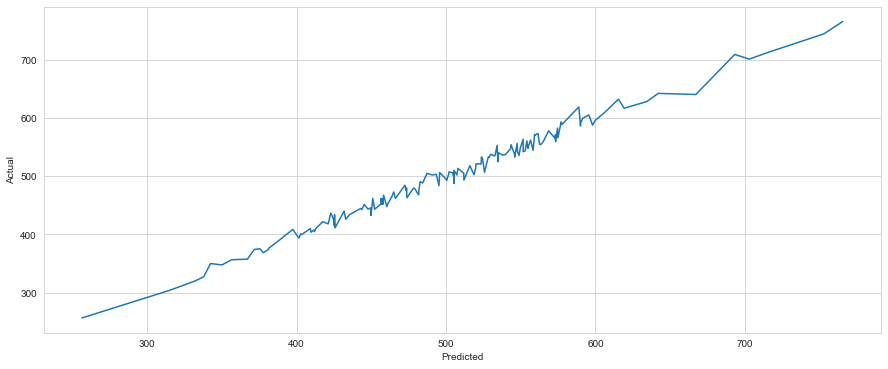

In [25]:
plt.figure(figsize=(15,6))
sns.lineplot(x=df['Predicted'],y=df['Actual'])

In the above graph, we can see that our model is giving us good results with the testing data.

<Axes: ylabel='variance'>

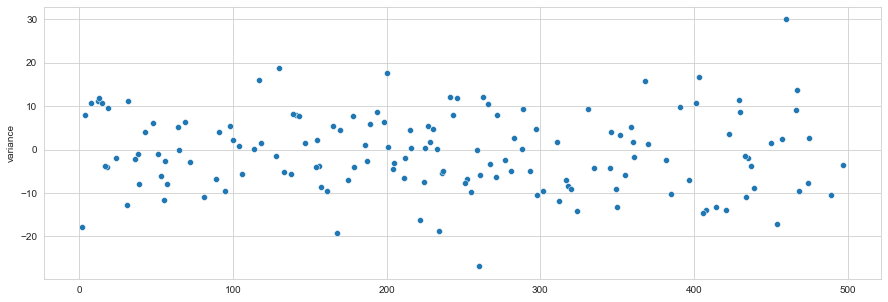

In [27]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=df.index,y=df['variance'])

## Evaluating the Model

* We will Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [29]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430832
MSE: 79.81305165097456
RMSE: 8.93381506697864


In [30]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


From the above coefficients for each column we can say that: 
- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.


So we can tell from the above model that the website is performing very poor as we compare it to the Mobile app. 
The company should focus to improve their Website to get same results as Mobile App.